In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('stores_sales_forecasting.csv', encoding='latin-1')
print(df.head())
print(df['Order Date'].head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [4]:
df['date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['date'])
print(df['date'].head())


0   2016-11-08
1   2016-11-08
2   2015-10-11
3   2014-06-09
4   2014-06-09
Name: date, dtype: datetime64[ns]


In [5]:
df = df.sort_values('date')
df = df.set_index('date')
print(df.head())

            Row ID        Order ID Order Date  Ship Date       Ship Mode  \
date                                                                       
2014-01-06    7475  CA-2014-167199   1/6/2014  1/10/2014  Standard Class   
2014-01-07    7661  CA-2014-105417   1/7/2014  1/12/2014  Standard Class   
2014-01-10     867  CA-2014-149020  1/10/2014  1/15/2014  Standard Class   
2014-01-11     717  CA-2014-130092  1/11/2014  1/14/2014     First Class   
2014-01-13    2979  CA-2014-109232  1/13/2014  1/16/2014    Second Class   

           Customer ID      Customer Name      Segment        Country  \
date                                                                    
2014-01-06    ME-17320      Maria Etezadi  Home Office  United States   
2014-01-07    VS-21820   Vivek Sundaresam     Consumer  United States   
2014-01-10    AJ-10780     Anthony Jacobs    Corporate  United States   
2014-01-11    SV-20365        Seth Vernon     Consumer  United States   
2014-01-13    ND-18370  Natal

In [6]:
print(df.describe())

            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


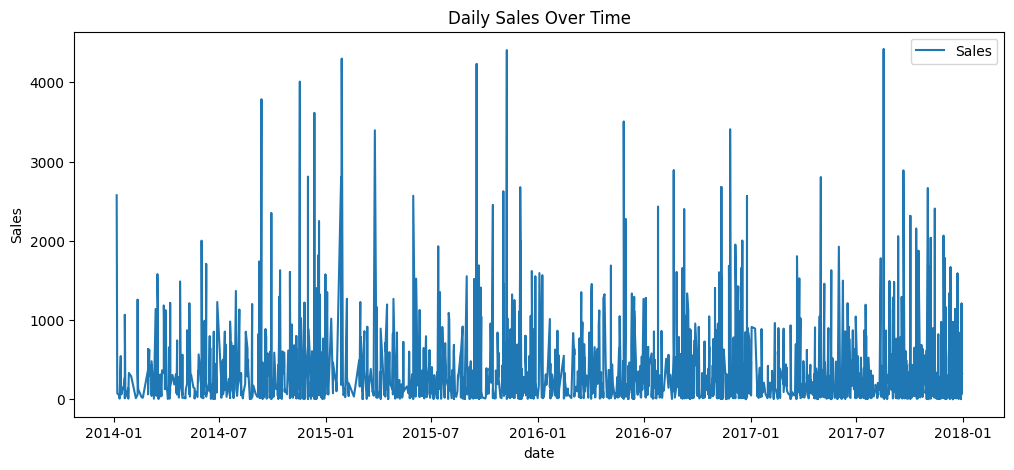

In [7]:
# Plot sales over time
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
plt.show()

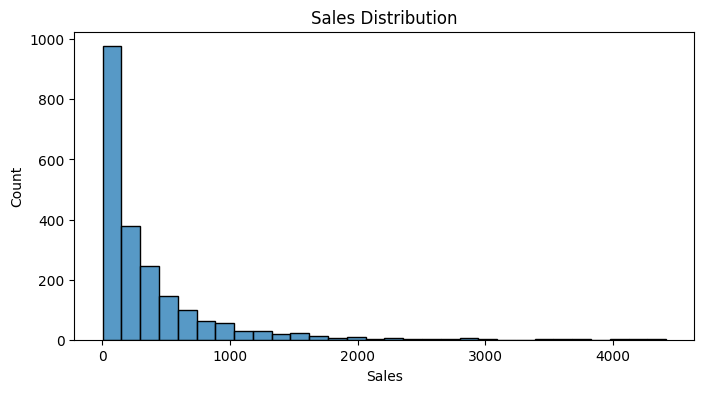

In [8]:
# Optional: histogram to see distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=30)
plt.title('Sales Distribution')
plt.show()

In [9]:
# Lag features
df['lag_1'] = df['Sales'].shift(1)
df['lag_7'] = df['Sales'].shift(7)

# Rolling mean
df['rolling_mean_7'] = df['Sales'].shift(1).rolling(7).mean()

# Date features
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter

df = df.dropna()

In [10]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train.drop('Sales', axis=1)
y_train = train['Sales']
X_test = test.drop('Sales', axis=1)
y_test = test['Sales']